DSC 275/475: Time Series Analysis and Forecasting (Fall 2021) Project-1 

Question 1

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [115]:
df=pd.read_csv("Problem1_DataSet.csv")
               #,header=0, index_col=0, parse_dates=True, squeeze=True)
df

,Month,Miles
0,Jan-64,7.269
1,Feb-64,6.775
2,Mar-64,7.819
3,Apr-64,8.371
4,May-64,9.069
...,...,...
79,Aug-70,14.057
80,Sep-70,16.234
81,Oct-70,12.389
82,Nov-70,11.594


In [4]:
x = df.Month
y = df.Miles

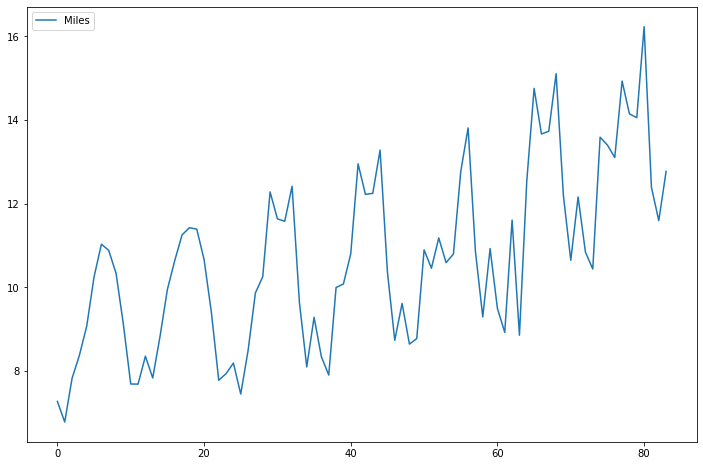

In [5]:
df.plot(figsize=(12,8))
pyplot.show()

Question 2

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

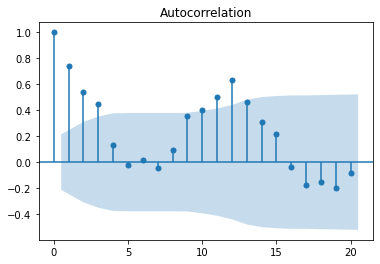

In [7]:
figure= plot_acf(y)

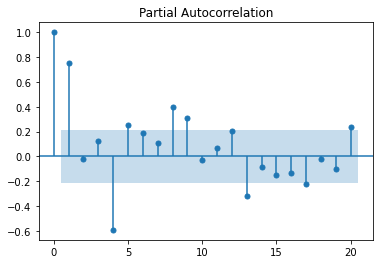

In [8]:
figure= plot_pacf(y)

 ACF shows an oscillation, indicating seasonality of 12.

Question 3:

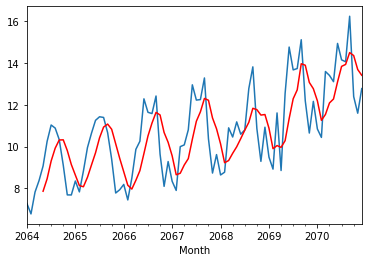

In [113]:
rolling = df.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
df.plot()
rolling_mean.plot(color='red')
pyplot.show()

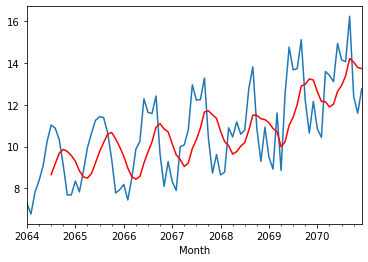

In [114]:
rolling = df.rolling(window=7)
rolling_mean = rolling.mean()
# plot original and transformed dataset
df.plot()
rolling_mean.plot(color='red')
pyplot.show()

Suitable choice for the moving average window length can be 5,6 or 7

Question 4: The trend line from the graph is increasing 

Question 5:

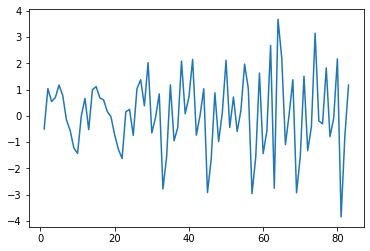

In [10]:
diff = y.diff()
diff = diff.iloc[1:]
plt.plot(diff)
plt.show()

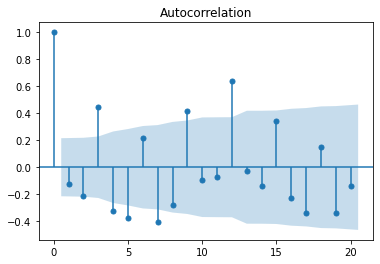

In [11]:
figure= plot_acf(diff)

The significant lags based on the ACF: 3,4,5,7,9,12

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


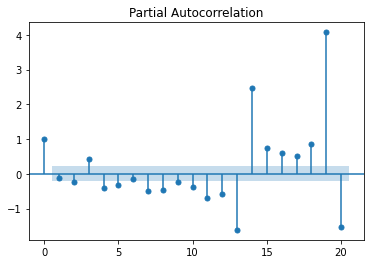

In [12]:
figure= plot_pacf(diff)

The significant lags based on the PACF: 2,3,4,5,7,8,11,20

Question 6:

In [13]:
df['Seasonal First Difference']=df['Miles']-df['Miles'].shift(12)

In [14]:
a=df['Seasonal First Difference'].dropna()

In [15]:
a

12    1.081
13    1.054
14    1.010
15    1.577
16    1.569
      ...  
79    0.326
80    1.124
81    0.204
82    0.949
83    0.611
Name: Seasonal First Difference, Length: 72, dtype: float64

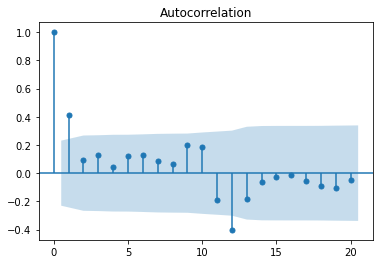

In [16]:
figure= plot_acf(a, lags=20)

The significant lags based on the ACF: 1,12

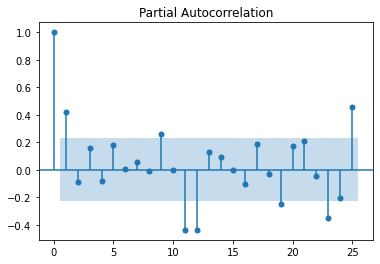

In [17]:
figure= plot_pacf(a,lags=25)

The significant lags based on the PACF: 1,9,11,12,19,25

In [18]:
df[12:]

,Month,Miles,Seasonal First Difference
12,Jan-65,8.350,1.081
13,Feb-65,7.829,1.054
14,Mar-65,8.829,1.010
15,Apr-65,9.948,1.577
16,May-65,10.638,1.569
...,...,...,...
79,Aug-70,14.057,0.326
80,Sep-70,16.234,1.124
81,Oct-70,12.389,0.204
82,Nov-70,11.594,0.949


<AxesSubplot:>

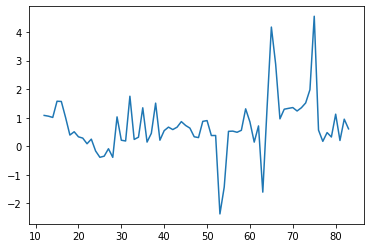

In [19]:
df['Seasonal First Difference'].plot()

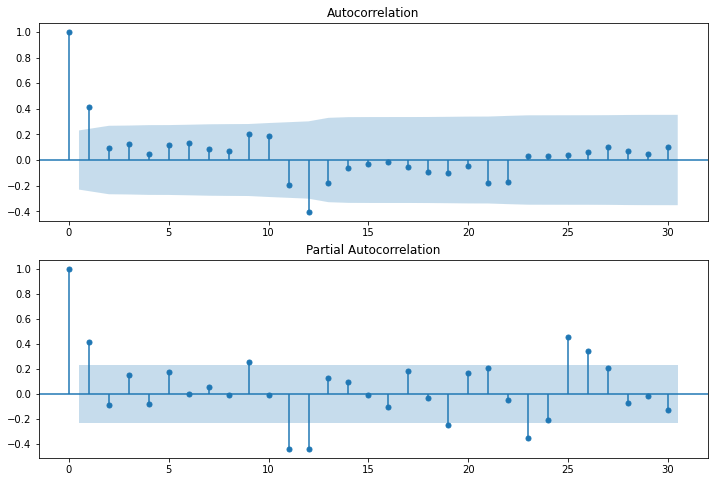

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=30,ax=ax2)


The significant lags based on the ACF: 1,12
The significant lags based on the PACF: 1,9,11,12,19,23,25,26

Question 7:

In [48]:
data= df[0:72] #first 6 years data only

In [49]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [50]:
# calculating best values
decomp= auto_arima(data['Miles'], start_p=0, start_q=0,
                  max_p=3,max_q=3,m=12,start_P=0, max_P=3,
                  start_Q=0, max_Q=3, d=None, D=None, trace=True,alpha=0.05,
                  seasonal=True,stepwise=False)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=164.080, Time=0.01 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=153.783, Time=0.09 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=154.367, Time=0.15 sec
 ARIMA(0,0,0)(0,1,3)[12] intercept   : AIC=156.234, Time=0.32 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=152.719, Time=0.04 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=154.373, Time=0.07 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=156.264, Time=0.35 sec
 ARIMA(0,0,0)(1,1,3)[12] intercept   : AIC=158.216, Time=1.21 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=154.305, Time=0.10 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=156.218, Time=0.32 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=158.216, Time=0.68 sec
 ARIMA(0,0,0)(2,1,3)[12] intercept   : AIC=160.216, Time=0.55 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=156.228, Time=0.32 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=158.216, Time=1.31 sec
 ARIMA(0,0,0)(3,1,2)[12] intercept   : AIC=160.216, Time=0.64 sec
 ARIMA(0,0

A couple of approaches could be:
Model 1: ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=198.558, Time=0.26 sec
Model 2: ARIMA(3,2,1)(3,2,1)[12] intercept   : AIC=164.584, Time=0.10 sec
Model 3: ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=146.584, Time=0.07 sec

I'm using AIC as the evaluation criteria!

In [59]:
model=sm.tsa.statespace.SARIMAX(data['Miles'],order=(3, 0, 1),seasonal_order=(1,0,0,12))
results=model.fit()

<AxesSubplot:>

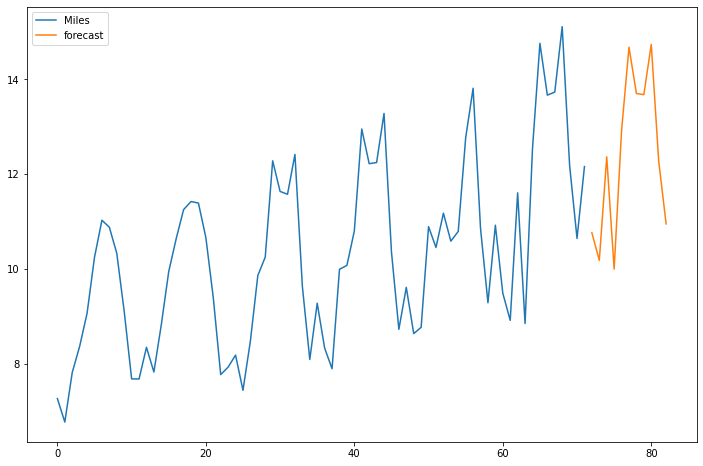

In [60]:
data['forecast'] = results.predict(start = 72, end = 84, dynamic= True)  
data[['Miles', 'forecast']].plot(figsize=(12, 8))

In [61]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Miles   No. Observations:                   83
Model:             SARIMAX(3, 0, 1)x(1, 0, [], 12)   Log Likelihood                 -97.000
Date:                             Tue, 26 Oct 2021   AIC                            205.999
Time:                                     01:21:30   BIC                            220.512
Sample:                                          0   HQIC                           211.830
                                              - 83                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3417      0.203      1.681      0.093      -0.057       0.740
ar.L2          0.2035      

In [54]:
#IGNORE
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)
data=data.append(pd.Series(), ignore_index=True)

APPROACH 2: AIC value is  164.374 which is much better than 1, and the plot also looks VERY similar and looks like it takes the trend into consideration because the plot is slightly higher but again it's not exactly perfect when it comes to the seasonal pattern. Rating of the pdq= 4/5

In [58]:
model2=sm.tsa.statespace.SARIMAX(data['Miles'],order=(3, 2, 1),seasonal_order=(3,2,1,12))
results2=model2.fit()

<AxesSubplot:>

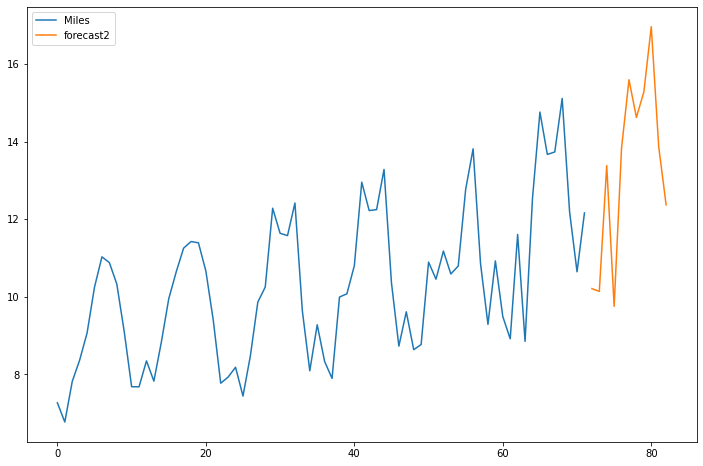

In [62]:
data['forecast2'] = results2.predict(start = 72, end = 84, dynamic= True)  
data[['Miles', 'forecast2']].plot(figsize=(12, 8))

In [63]:
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Miles   No. Observations:                   83
Model:             SARIMAX(3, 2, 1)x(3, 2, 1, 12)   Log Likelihood                 -73.187
Date:                            Tue, 26 Oct 2021   AIC                            164.374
Time:                                    01:21:41   BIC                            182.762
Sample:                                         0   HQIC                           171.520
                                             - 83                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2153      0.182     -1.185      0.236      -0.571       0.141
ar.L2         -0.3698      0.206   

APPROACH 3:AIC value is 160.908 which is much better, and the plot also looks VERY similar but again looks like it does not take the trend into consideration because the plot is on the same height. Rating of the pdq= 3/5

In [64]:
model3=sm.tsa.statespace.SARIMAX(data['Miles'],order=(0, 0, 1),seasonal_order=(1,1,0,12))
results3=model3.fit()

<AxesSubplot:>

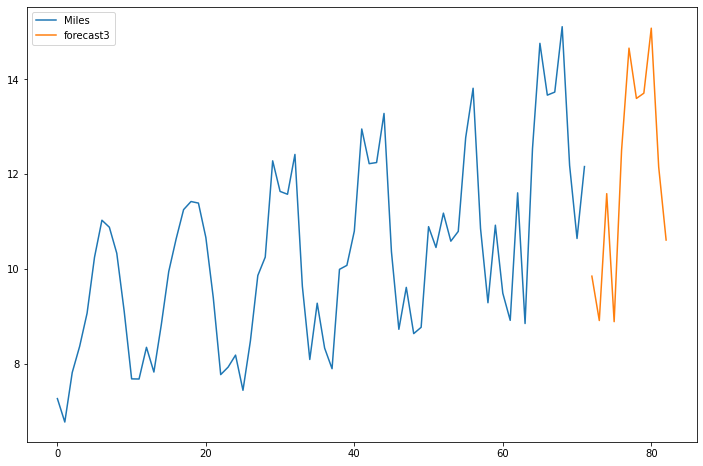

In [65]:
data['forecast3'] = results3.predict(start = 72, end = 84, dynamic= True)  
data[['Miles', 'forecast3']].plot(figsize=(12, 8))

In [66]:
print(results3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Miles   No. Observations:                   83
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                 -77.454
Date:                             Tue, 26 Oct 2021   AIC                            160.908
Time:                                     01:21:55   BIC                            167.696
Sample:                                          0   HQIC                           163.607
                                              - 83                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6822      0.117      5.814      0.000       0.452       0.912
ar.S.L12      -0.0242      

APPROACH 4: AIC value is 159.498 which is much better, and the plot also looks similar but again it does not follow seasonality pattern properly. Rating of the pdq= 3/5

In [68]:
model4=sm.tsa.statespace.SARIMAX(data['Miles'],order=(3, 1, 2),seasonal_order=(3,2,2,12))
results4=model4.fit()

<AxesSubplot:>

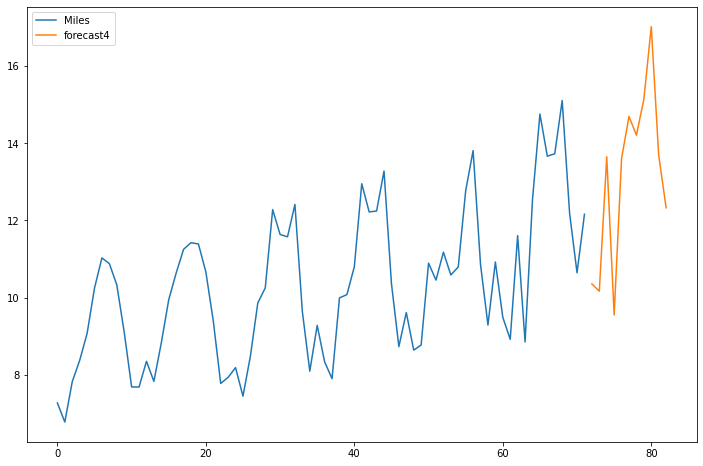

In [69]:
data['forecast4'] = results4.predict(start = 72, end = 84, dynamic= True)  
data[['Miles', 'forecast4']].plot(figsize=(12, 8))

In [70]:
print(results4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Miles   No. Observations:                   83
Model:             SARIMAX(3, 1, 2)x(3, 2, 2, 12)   Log Likelihood                 -68.749
Date:                            Tue, 26 Oct 2021   AIC                            159.498
Time:                                    01:22:09   BIC                            182.163
Sample:                                         0   HQIC                           168.327
                                             - 83                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5792     10.878     -0.053      0.958     -21.900      20.742
ar.L2          0.1435      4.572   

APPROACH 5: AIC value is 159.498 which is much better, and the plot also looks similar but again it does not follow seasonality pattern properly. Rating of the pdq= 3/5

In [71]:
model5=sm.tsa.statespace.SARIMAX(data['Miles'],order=(3, 2, 3),seasonal_order=(3,2,3,12))
results5=model5.fit()

<AxesSubplot:>

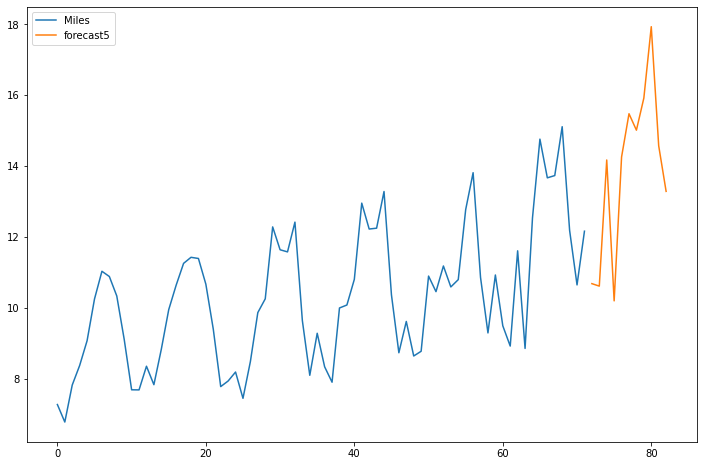

In [72]:
data['forecast5'] = results5.predict(start = 72, end = 84, dynamic= True)  
data[['Miles', 'forecast5']].plot(figsize=(12, 8))

In [73]:
print(results4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Miles   No. Observations:                   83
Model:             SARIMAX(3, 1, 2)x(3, 2, 2, 12)   Log Likelihood                 -68.749
Date:                            Tue, 26 Oct 2021   AIC                            159.498
Time:                                    01:22:24   BIC                            182.163
Sample:                                         0   HQIC                           168.327
                                             - 83                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5792     10.878     -0.053      0.958     -21.900      20.742
ar.L2          0.1435      4.572   

Question 8:

In [74]:
modelfinal=sm.tsa.statespace.SARIMAX(df['Miles'],order=(3, 1, 3),seasonal_order=(3,1,0,12))
resultsfinal=modelfinal.fit()

<AxesSubplot:>

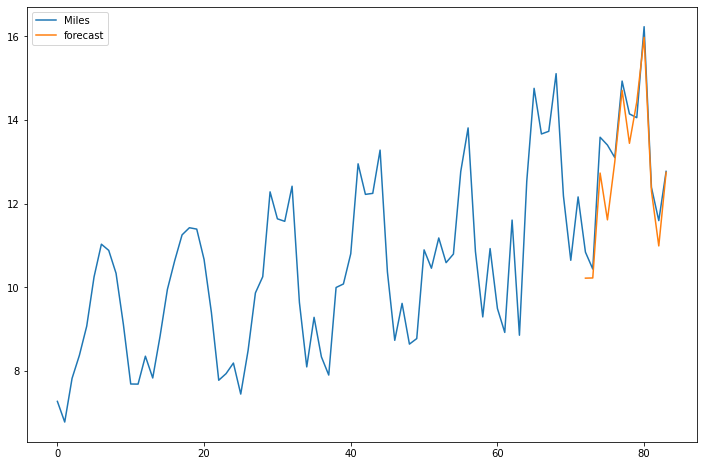

In [75]:
df['forecast']=resultsfinal.predict(start=72,end=84,dynamic=True)
df[['Miles','forecast']].plot(figsize=(12,8))

In [76]:
print(resultsfinal.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Miles   No. Observations:                   84
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                 -80.303
Date:                             Tue, 26 Oct 2021   AIC                            180.607
Time:                                     01:22:38   BIC                            203.233
Sample:                                          0   HQIC                           189.605
                                              - 84                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6678      0.309     -2.158      0.031      -1.274      -0.061
ar.L2         -0.6677      

In [81]:
df[72:] #compare actual values to forecasted values!

,Month,Miles,Seasonal First Difference,forecast
72,Jan-70,10.840,1.349,10.217580
73,Feb-70,10.436,1.517,10.222063
74,Mar-70,13.589,1.982,12.731674
75,Apr-70,13.402,4.550,11.612775
76,May-70,13.103,0.566,12.998826
77,Jun-70,14.933,0.174,14.710351
78,Jul-70,14.147,0.480,13.443494
79,Aug-70,14.057,0.326,14.433915
80,Sep-70,16.234,1.124,15.979700
81,Oct-70,12.389,0.204,12.300071


In [98]:
maerror= mean_absolute_error((df["Miles"]).iloc[72:83], df["forecast"].iloc[72:83])
mae

0.13139640993766555

USED: order=(3, 1, 3),seasonal_order=(3,1,0,12)
The forecast is very close to the actual values as you can see in the graph and the table, but not exactly the same. I tried playing around with different p,q, P, Q values to see which one would follow the actual values closely, turns out this is the best one I could find. The AIC value is 180.607 and the forecast nearly follows the actual values.  
It also follows the increasing trend of actual values. Mean absolute error is also 0.13139!

In [99]:
df1=pd.read_csv("TotalWine.csv")

In [100]:
df1.head()

,Time,TotalWine
0,1,1.486
1,2,1.915
2,3,1.844
3,4,2.808
4,5,1.287


Part A

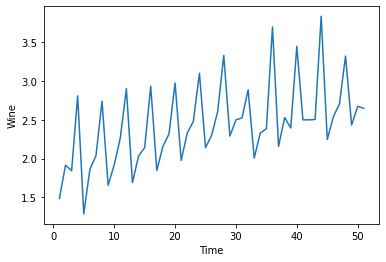

In [101]:
x1 = df1["Time"]
y1 = df1.TotalWine
plt.plot (x1, y1)
plt.xlabel ('Time')
plt.ylabel ('Wine')
plt.show()

Part B

In [102]:
df1['Seasonal First Difference 1']=y1-y1.shift(1)
df1['Seasonal First Difference 2']=y1-y1.shift(2)
df1['Seasonal First Difference 4']=y1-y1.shift(4)
df1['Seasonal First Difference 6']=y1-y1.shift(6)

<AxesSubplot:>

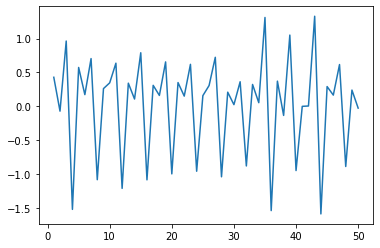

In [103]:
df1['Seasonal First Difference 1'].plot()

<AxesSubplot:>

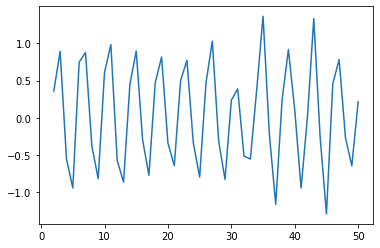

In [104]:
df1['Seasonal First Difference 2'].plot()

<AxesSubplot:>

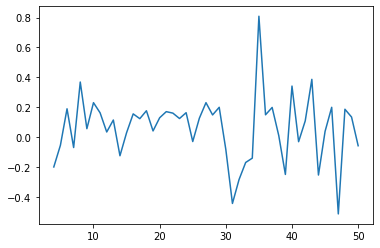

In [105]:
df1['Seasonal First Difference 4'].plot()

<AxesSubplot:>

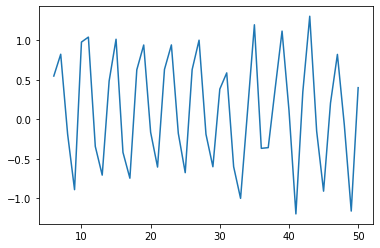

In [106]:
df1['Seasonal First Difference 6'].plot()

4 difference is best suited!

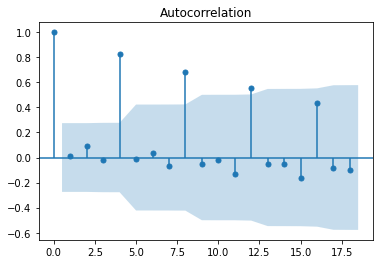

In [107]:
figure= plot_acf(y1)

Seasonality period is 4-lag long.

In [108]:
from statsmodels.tsa.api import AR
bestlag= AR(df1['Seasonal First Difference 4'].dropna().values).select_order(maxlag=10, ic='aic')
bestlag

5

Best lag is 5,we should use AR(5)

In [109]:
model= AR(df1['Seasonal First Difference 4'].dropna().values).fit(maxlag=5)
forecast= model.predict()

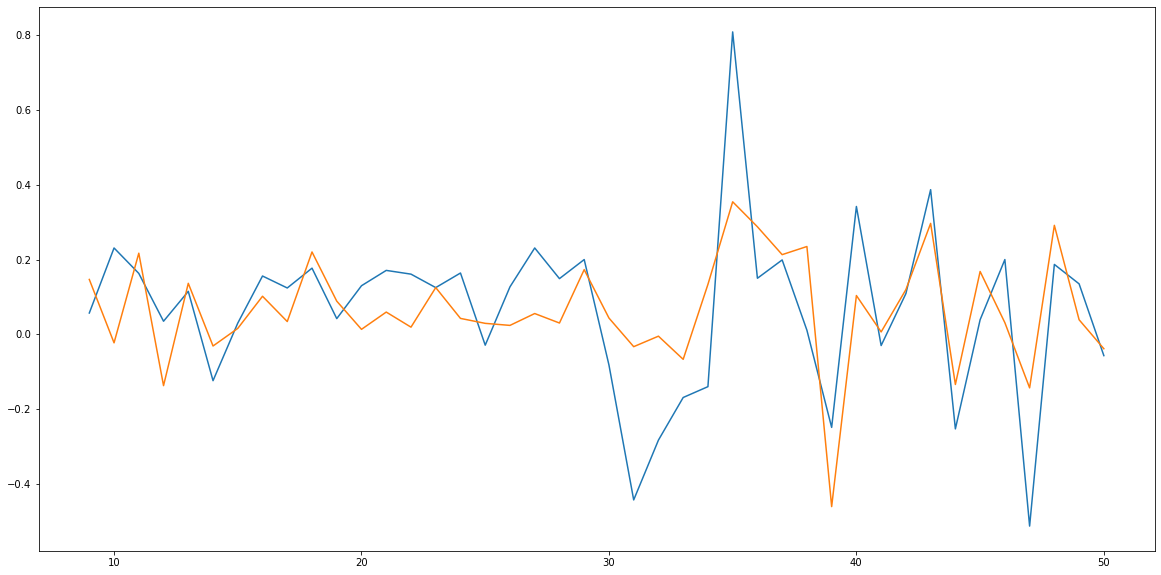

In [110]:
plt.figure(figsize=(20,10))
df1['Seasonal First Difference 4'].dropna().iloc[5:].plot()
plt.plot(df1['Seasonal First Difference 4'].dropna().iloc[5:].index, forecast)

In [111]:
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(df1['Seasonal First Difference 4'].dropna().iloc[5:], forecast)
mae

0.13139640993766555